# Opening problem

It is the world, the environment, or the universe of what we are interested.

<img src="https://github.com/tatpongkatanyukul/AIX/raw/main/pics/F3p1Map.png" alt="Romania" width="600"/>

In [1]:
towns ={'Arad': (91, 492), 'Bucharest': (400, 327), 'Craiova': (253, 288), \
    'Drobeta': (165, 299), 'Eforie': (562, 293), 'Fagaras': (305, 449), \
    'Giurgiu': (375, 270), 'Hirsova': (534, 350), 'Iasi': (473, 506), \
    'Lugoj': (165, 379), 'Mehadia': (168, 339), 'Neamt': (406, 537), \
    'Oradea': (131, 571), 'Pitesti': (320, 368), 'Rimnicu Vilcea': (233, 410), \
    'Sibiu': (207, 457), 'Timisoara': (94, 410), 'Urziceni': (456, 350), \
    'Vaslui': (509, 444), 'Zerind': (108, 531)}

roads = {'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
        'Bucharest': {'Urziceni': 85, 'Pitesti': 101, 'Giurgiu': 90, 'Fagaras': 211},
        'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
        'Drobeta': {'Mehadia': 75, 'Craiova': 120},
        'Eforie': {'Hirsova': 86},
        'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
        'Giurgiu': {'Bucharest': 90},
        'Hirsova': {'Urziceni': 98, 'Eforie': 86},
        'Iasi': {'Vaslui': 92, 'Neamt': 87},
        'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
        'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
        'Neamt': {'Iasi': 87},
        'Oradea': {'Zerind': 71, 'Sibiu': 151},
        'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
        'Rimnicu Vilcea': {'Sibiu': 80, 'Pitesti': 97, 'Craiova': 146},
        'Sibiu': {'Rimnicu Vilcea': 80, 'Arad': 140, 'Oradea': 151, 'Fagaras': 99},
        'Timisoara': {'Lugoj': 111, 'Arad': 118},
        'Urziceni': {'Vaslui': 142, 'Bucharest': 85, 'Hirsova': 98},
        'Vaslui': {'Iasi': 92, 'Urziceni': 142},
        'Zerind': {'Oradea': 71, 'Arad': 75} }

romania_map = {"location": towns, "transit": roads}

In [2]:
romania_map["transit"]["Sibiu"]

{'Rimnicu Vilcea': 80, 'Arad': 140, 'Oradea': 151, 'Fagaras': 99}

In [3]:
romania_map["transit"]["Sibiu"].keys()

dict_keys(['Rimnicu Vilcea', 'Arad', 'Oradea', 'Fagaras'])

# Data structure

## Problem

In [2]:
class SimpleRoutingProblem:
    "The problem of searching a graph from one node to another."
    def __init__(self, local_map, initial, goal):
        self.map = local_map
        self.initial = initial
        self.goal = goal

    def successor(self, current_town):
        """
        Take:   Current town/state
        Return: A list of (road/action, next town/next state) pairs.
        """

        options = []
        for town in self.map['transit'][current_town].keys():
            next_town = town
            road = current_town + '-' + town
            options.append( (road, town) )
        
        return options

    def goal_test(self, town):
        return town == self.goal

In [3]:
romania = SimpleRoutingProblem(romania_map, "Bucharest", "Vaslui") 

In [4]:
romania.successor("Bucharest")

[('Bucharest-Urziceni', 'Urziceni'),
 ('Bucharest-Pitesti', 'Pitesti'),
 ('Bucharest-Giurgiu', 'Giurgiu'),
 ('Bucharest-Fagaras', 'Fagaras')]

In [5]:
romania.successor("Urziceni")

[('Urziceni-Vaslui', 'Vaslui'),
 ('Urziceni-Bucharest', 'Bucharest'),
 ('Urziceni-Hirsova', 'Hirsova')]

In [6]:
romania.goal_test('Vaslui')

True

## Town/Node

In [7]:
class Town:
    def __init__(self, name, parent=None, action=None):
        self.name = name       # Current town name
        self.parent = parent   # Previous town OBJECT!
        self.action = action   # Which road has been taken from previous town to the current town
                    
    def path(self):
        x = self
        result = [x.name]
        while x.parent is not None:
            result.append(x.parent.name)
            x = x.parent
        return result

    def expand(self, problem):
        nexts = []

        for road, next_town in problem.successor(self.name):
            nexts.append(Town(next_town, self, road))
        
        return nexts

    def __str__(self):
        from_town = "nowhere"
        if self.parent is not None:
            from_town = self.parent.name
        thru = "nothing"
        if self.action is not None:
            thru = self.action
            
        return self.name + f" (from {from_town} thru {thru})"

In [8]:
t1 = Town("Bucharest", None, None)

print(t1)

Bucharest (from nowhere thru nothing)


In [9]:
t1.expand(romania)

In [10]:
for t2 in t1.expand(romania):
    print(t2)

Urziceni (from Bucharest thru Bucharest-Urziceni)
Pitesti (from Bucharest thru Bucharest-Pitesti)
Giurgiu (from Bucharest thru Bucharest-Giurgiu)
Fagaras (from Bucharest thru Bucharest-Fagaras)


In [22]:
print(t2)

Fagaras (from Bucharest thru Bucharest-Fagaras)


In [23]:
t2.path()

['Fagaras', 'Bucharest']

In [13]:
for t3 in t2.expand(romania):
    print(t3)

Sibiu (from Fagaras thru Fagaras-Sibiu)
Bucharest (from Fagaras thru Fagaras-Bucharest)


In [14]:
print(t3)

Bucharest (from Fagaras thru Fagaras-Bucharest)


In [15]:
t3.path()

['Bucharest', 'Fagaras', 'Bucharest']

# Breadth-first search

## Raw

In [16]:
problem = romania

# Set up a queue
fringe = []                             
fringe.append(Town(problem.initial))

# Search
while len(fringe) > 0:   

    # Pop the first in queue
    candidate = fringe[0] 
    fringe = fringe[1:]

    # Check it out
    if problem.goal_test(candidate.name): 

        # Yes! Found it.
        print('Done! It is the `candidate`.')
        print("Here's the path:", candidate.path()[::-1])
        break

    # Nah, not yet
    # Have its successors in the queue
    fringe.extend(candidate.expand(problem))   # Expand the fringe 

# end while


Done! It is the `candidate`.
Here's the path: ['Bucharest', 'Urziceni', 'Vaslui']


## Raw with details

I want to see how the queue ```fringe``` progresses.

In [17]:
t3.expand(romania)

In [18]:
def showq(list_objs):
    msg = '['
    for o in list_objs:
        msg += o.name +', '
    msg = msg.strip()[:-1] + ']'
    print(msg)


In [19]:
showq(t3.expand(romania))

[Urziceni, Pitesti, Giurgiu, Fagaras]


Now see how BFS works again

In [20]:
problem = romania

# Configure initial and goal
problem.initial = 'Bucharest'
problem.goal = 'Vaslui'


# Set up a queue
fringe = []                             
fringe.append(Town(problem.initial))

showq(fringe)

# Search
while len(fringe) > 0:   

    # Pop the first in queue
    candidate = fringe[0] 
    fringe = fringe[1:]

    # Check it out
    if problem.goal_test(candidate.name): 

        # Yes! Found it.
        print('\nDone! It is the `candidate`.')
        print("Here's the path:", candidate.path()[::-1])
        break

    # Nah, not yet
    # Have its successors in the queue
    fringe.extend(candidate.expand(problem))   # Expand the fringe 

    showq(fringe)

# end while


[Bucharest]
[Urziceni, Pitesti, Giurgiu, Fagaras]
[Pitesti, Giurgiu, Fagaras, Vaslui, Bucharest, Hirsova]
[Giurgiu, Fagaras, Vaslui, Bucharest, Hirsova, Rimnicu Vilcea, Craiova, Bucharest]
[Fagaras, Vaslui, Bucharest, Hirsova, Rimnicu Vilcea, Craiova, Bucharest, Bucharest]
[Vaslui, Bucharest, Hirsova, Rimnicu Vilcea, Craiova, Bucharest, Bucharest, Sibiu, Bucharest]

Done! It is the `candidate`.
Here's the path: ['Bucharest', 'Urziceni', 'Vaslui']


## Pack it nicely

In [21]:
def breadth_first_search(problem, show=False):
    fringe = []                             # Set up a FIFO queue
    fringe.append(Town(problem.initial))    # Add the initial town/state

    if show:
        showq(fringe)

    while len(fringe) > 0:                    # Check if queue is not empty

        # Pop the first in queue
        node = fringe[0]; 
        fringe = fringe[1:] 

        # Check it out
        if problem.goal_test(node.name):     # Check if goal is reach
            return node                       # Yes, return the found

        # Have its successors in the queue
        fringe.extend(node.expand(problem))   # Expand the fringe 
        if show:
            showq(fringe)        
    return None                               # There is no solution

In [22]:
type(romania)

__main__.SimpleRoutingProblem

In [23]:
romania.initial

'Bucharest'

In [24]:
romania.goal

'Vaslui'

In [25]:
res = breadth_first_search(romania, show=False)
res.path()

['Vaslui', 'Urziceni', 'Bucharest']

In [29]:
res.path()[::-1]

['Bucharest', 'Urziceni', 'Vaslui']

In [31]:
res = breadth_first_search(romania, show=True)

print()
print('Solution:')
res.path()

[Bucharest]
[Urziceni, Pitesti, Giurgiu, Fagaras]
[Pitesti, Giurgiu, Fagaras, Vaslui, Bucharest, Hirsova]
[Giurgiu, Fagaras, Vaslui, Bucharest, Hirsova, Rimnicu Vilcea, Craiova, Bucharest]
[Fagaras, Vaslui, Bucharest, Hirsova, Rimnicu Vilcea, Craiova, Bucharest, Bucharest]
[Vaslui, Bucharest, Hirsova, Rimnicu Vilcea, Craiova, Bucharest, Bucharest, Sibiu, Bucharest]

Solution:


['Vaslui', 'Urziceni', 'Bucharest']

In [32]:
romania.initial = 'Pitesti'
romania.goal = 'Timisoara'

res = breadth_first_search(romania, show=False)
res.path()

['Timisoara', 'Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti']

In [33]:
res.path()[::-1]

['Pitesti', 'Rimnicu Vilcea', 'Sibiu', 'Arad', 'Timisoara']

# Generalize the breadth-first search code

## Routing problem

In [26]:
# Constant
infinity = 1.0e400

class RoutingProblem:
    "The problem of searching a graph from one node to another."
    def __init__(self, local_map, initial, goal):
        self.map = local_map
        self.initial = initial
        self.goal = goal

    def successor(self, s):
        """
        Take s: current state/current town
        Return a list of (action, result/linked town) pairs.
        """

        options = []
        for town in self.map['transit'][s].keys():
            next_town = town
            road = s + '-' + town
            options.append( (road, town) )
        
        return options

    def path_cost(self, cost_to_s, s, action, snext):

        transit_cost = infinity
        if s in self.map["transit"]:
            if snext in self.map["transit"][s]:
                transit_cost = self.map["transit"][s][snext]

        return cost_to_s + transit_cost

    def goal_test(self, state):
        return state == self.goal

    def h(self, state):
        cx, cy = self.map["location"][state]
        gx, gy = self.map["location"][self.goal]

        # Squared Euclidean distance
        return math.sqrt( (cx - gx)**2 + (cy - gy)**2 )


In [27]:
romania = RoutingProblem(romania_map, "Bucharest", "Vaslui") 

## Town = Node (or State)

In [13]:
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent is not None: 
            self.depth = parent.depth + 1
                    
    def path(self):
        x, result = self, [self]
        while x.parent is not None:
            result.append(x.parent)
            x = x.parent
        return result

    def expand(self, problem):
        nexts = []
        for (action, next_state) in problem.successor(self.state):
            nexts.append(Node(next_state, self, action,
                         problem.path_cost(self.path_cost, self.state, action, next_state)))

        return nexts

    def __str__(self):
        from_state = "None"
        if self.parent is not None:
            from_state = self.parent.state
        thru = "None"
        if self.action is not None:
            thru = self.action
            
        return self.state + f" (from {from_state} by {thru})"

In [14]:
t1 = Node("Bucharest", None, None)

print(t1)

Bucharest (from None by None)


In [30]:
t1.expand(romania)

In [31]:
for t2 in t1.expand(romania):
    print(t2)

Urziceni (from Bucharest by Bucharest-Urziceni)
Pitesti (from Bucharest by Bucharest-Pitesti)
Giurgiu (from Bucharest by Bucharest-Giurgiu)
Fagaras (from Bucharest by Bucharest-Fagaras)


In [40]:
for t3 in t2.expand(romania):
    print(t3)

Sibiu (from Fagaras by Fagaras-Sibiu)
Bucharest (from Fagaras by Fagaras-Bucharest)


In [41]:
t3.path()

In [42]:
for t in t3.path():
    print(t.state)

Bucharest
Fagaras
Bucharest


## Python list to FIFOQueue

In [43]:
class FIFOQueue():
    """A First-In-First-Out Queue."""
    def __init__(self):
        self.A = []; self.start = 0
    def append(self, item):
        self.A.append(item)
    def __len__(self):
        return len(self.A) - self.start
    def extend(self, items):
        self.A.extend(items)     
    def pop(self):        
        e = self.A[self.start]
        self.start += 1
        # if self.start > 5 and self.start > len(self.A)/2:
        #     self.A = self.A[self.start:]
        #     self.start = 0
        return e

    def is_empty(self):
        return self.__len__() == 0


In [44]:
q = FIFOQueue()
q.append('A')
q.append('R')
q.append('G')
q.append('E')

q.extend(['N', 'T', 'I', 'N', 'A'])

In [45]:
while not q.is_empty():
    print(q.pop())

A
R
G
E
N
T
I
N
A


## breadth-first search function

In [46]:
def breadth_first_search(problem):
    fringe = FIFOQueue()                    # Set up a FIFO queue
    fringe.append(Node(problem.initial))    # Add the initial state

    while not fringe.is_empty():            # Traverse a queue
        node = fringe.pop()                 # Pop the first in queue
        if problem.goal_test(node.state):   # Check if goal is reach
            return node                     # Yes, return the found
        fringe.extend(node.expand(problem)) # Expand the fringe 
    return None                             # There is no solution


In [47]:
romania.initial = 'Pitesti'
romania.goal = 'Timisoara'

res = breadth_first_search(romania)
for t in res.path():
    print(t.state)

Timisoara
Arad
Sibiu
Rimnicu Vilcea
Pitesti


In [48]:
for t in res.path()[::-1]:
    print(t.state)

Pitesti
Rimnicu Vilcea
Sibiu
Arad
Timisoara


# Generalize the search

## Queue

In [11]:
import bisect

class PriorityQueue:
    def __init__(self, order=min, f=lambda x: x):
        self.A = [] # Queue
        self.order = order
        self.f = f

    def append(self, item):
        """
        It appends the item into a proper position in the sorted queue.
        """
        bisect.insort(self.A, (self.f(item), item))

    def __len__(self):
        return len(self.A)

    def pop(self):
        if self.order == min:
            return self.A.pop(0)[1]
        else:
            return self.A.pop()[1]
            
    def extend(self, items):
        for item in items: self.append(item)
            
    def is_empty(self):
        return self.__len__() == 0


## Show queue

In [12]:
def showq(q, name="queue"):
    qtxt = ""
    for f, i in q.A:
        qtxt += "({:.3f},{}) ".format(f,i.state)
    print("* {}:[{}]".format(name, qtxt.strip()))


## Best-first search

In [53]:
def best_first_search(problem, f, show=False):
    fringe = PriorityQueue(min, f)                              # Set up a queue by f of node
    fringe.append(Node(problem.initial))                        # Add the initial state
    search_cost = 0
    if show:
        showq(fringe)

    reached = {}                                                # A record of states reached
    while not fringe.is_empty():                                # Traverse a queue
        node = fringe.pop()                                     # Pop the first in queue
        if problem.goal_test(node.state):                       # Check if goal is reach
            return node, search_cost                            # Yes, return the found
        if (node.state not in reached) or (node.path_cost < reached[node.state].path_cost):    
                                                                # Check if it's a new node or an old one with a better path     
            reached[node.state] = node                          # Track new reached (or better reached)
            fringe.extend(node.expand(problem))                 # Expand the fringe 
            search_cost += 1
            if show:
                showq(fringe)

    return None, search_cost                                     # There is no solution


## Breadth-first search thru best-first search

In [54]:
from random import seed
from random import random

# First, choose fee function
def fee(node):
    return node.depth + 0.01*random() 
    # The random part is to break tie, 
    # otherwise bisect.insort will have a hard time working

romania.initial = 'Arad'
romania.goal = 'Bucharest'

rst, scost = best_first_search(romania, fee, show=True)

* queue:[(0.009,Arad)]
* queue:[(1.002,Timisoara) (1.005,Zerind) (1.008,Sibiu)]
* queue:[(1.005,Zerind) (1.008,Sibiu) (2.003,Lugoj) (2.006,Arad)]
* queue:[(1.008,Sibiu) (2.000,Arad) (2.002,Oradea) (2.003,Lugoj) (2.006,Arad)]
* queue:[(2.000,Arad) (2.002,Oradea) (2.002,Fagaras) (2.002,Oradea) (2.003,Lugoj) (2.006,Arad) (2.008,Arad) (2.008,Rimnicu Vilcea)]
* queue:[(2.002,Fagaras) (2.002,Oradea) (2.003,Lugoj) (2.006,Arad) (2.008,Arad) (2.008,Rimnicu Vilcea) (3.005,Zerind) (3.007,Sibiu)]
* queue:[(2.002,Oradea) (2.003,Lugoj) (2.006,Arad) (2.008,Arad) (2.008,Rimnicu Vilcea) (3.005,Zerind) (3.006,Sibiu) (3.006,Bucharest) (3.007,Sibiu)]
* queue:[(2.003,Lugoj) (2.006,Arad) (2.008,Arad) (2.008,Rimnicu Vilcea) (3.002,Zerind) (3.002,Sibiu) (3.005,Zerind) (3.006,Sibiu) (3.006,Bucharest) (3.007,Sibiu)]
* queue:[(2.006,Arad) (2.008,Arad) (2.008,Rimnicu Vilcea) (3.002,Zerind) (3.002,Sibiu) (3.005,Zerind) (3.006,Sibiu) (3.006,Bucharest) (3.007,Mehadia) (3.007,Sibiu) (3.008,Timisoara)]
* queue:[(3.002

In [57]:
for t in rst.path()[::-1]:
    print(t.state)

Arad
Sibiu
Fagaras
Bucharest


## Depth-first search thru best-first search

In [58]:
def fee(node):
    return -node.depth + 0.01*random() 

romania.initial = 'Arad'
romania.goal = 'Bucharest'

rst, scost = best_first_search(romania, fee, show=True)

* queue:[(0.007,Arad)]
* queue:[(-0.996,Zerind) (-0.995,Sibiu) (-0.991,Timisoara)]
* queue:[(-1.997,Arad) (-1.993,Oradea) (-0.995,Sibiu) (-0.991,Timisoara)]
* queue:[(-2.996,Zerind) (-2.996,Sibiu) (-0.995,Sibiu) (-0.991,Timisoara)]
* queue:[(-3.997,Rimnicu Vilcea) (-3.997,Fagaras) (-3.995,Oradea) (-3.993,Arad) (-0.995,Sibiu) (-0.991,Timisoara)]
* queue:[(-4.999,Sibiu) (-4.992,Pitesti) (-4.992,Craiova) (-3.997,Fagaras) (-3.995,Oradea) (-3.993,Arad) (-0.995,Sibiu) (-0.991,Timisoara)]
* queue:[(-5.999,Rimnicu Vilcea) (-5.993,Bucharest) (-5.992,Craiova) (-4.992,Craiova) (-3.997,Fagaras) (-3.995,Oradea) (-3.993,Arad) (-0.995,Sibiu) (-0.991,Timisoara)]


In [59]:
for t in rst.path()[::-1]:
    print(t.state)

Arad
Zerind
Oradea
Sibiu
Rimnicu Vilcea
Pitesti
Bucharest


# Breadth- vs depth-first searches

We see

* 1. Search cost

* 2. Solution depth
 
See formal discussion in the [handout](https://monet.en.kku.ac.th/courses/EN813711/y2024/Materials/w3searchV1.pdf).

In [60]:
def breadth_fee(node):
    return node.depth + 0.01*random()

def depth_fee(node):
    return -node.depth + 0.01*random()

In [61]:
romania.initial = 'Arad'
romania.goal = 'Bucharest'

rstB, scostB = best_first_search(romania, breadth_fee, show=False)
rstD, scostD = best_first_search(romania, depth_fee, show=False)

print(f'Breadth-fs cost: {scostB} ; depth-fs cost: {scostD}')
print(f'Breadth-fs depth: {rstB.depth}; depth-fs depth: {rstD.depth}')

Breadth-fs cost: 10 ; depth-fs cost: 9
Breadth-fs depth: 3; depth-fs depth: 9


In [62]:
print('Breadth-first search')

for t in rstB.path()[::-1]:
    print(t.state, end='; ')

print('\n\nDepth-first search')

for t in rstD.path()[::-1]:
    print(t.state, end='; ')

Breadth-first search
Arad; Sibiu; Fagaras; Bucharest; 

Depth-first search
Arad; Timisoara; Lugoj; Mehadia; Drobeta; Craiova; Rimnicu Vilcea; Sibiu; Fagaras; Bucharest; 

## Experiment

# Uniform-cost search

$$\min_\mathbf{x} \mathrm{cost}(\mathbf{x})$$

Find the solution $\mathbf{x}$, e.g., a route from an initial to a goal,  with the minimal cost.

For a routing problem, "cost" can be distance, driving time, a number of cities visited.

* $\mathrm{cost} \equiv$ a number of cities visited $\Rightarrow$ breadth-first search.

In [77]:
def fee(node):
    return node.depth + 0.01*random()

romania.initial = "Arad"
romania.goal = "Bucharest"

rst1, scost1 = best_first_search(romania, fee, show=False)

for t in rst1.path()[::-1]:
    print(t.state, end='; ')

print('Distance:', rst1.path_cost)

Arad; Sibiu; Fagaras; Bucharest; Distance: 450


* $\mathrm{cost} \equiv$ distance traveled

See the following example

In [63]:
# path_cost is accumulated transit cost, i.e., distance.

def fee(node):
    return node.path_cost
    # return node.depth + 0.01*random()

In [64]:
romania.initial = "Bucharest"
romania.goal = "Sibiu"

rst2, scost2 = best_first_search(romania, fee, show=False)

for t in rst2.path()[::-1]:
    print(t.state, end='; ')

print('Distance:', rst2.path_cost)

Bucharest; Pitesti; Rimnicu Vilcea; Sibiu; Distance: 278


> Dijkstra's algorithm searches for shortest paths from root to every other node in a graph, whereas uniform-cost searches for shortest paths in terms of cost to a goal node.

# Q & A

## Dijkstra algorithm vs Uniform cost search

> Uniform Cost Search: Primarily used in artificial intelligence for finding the least cost path in a search space. It is suitable for both explicit and implicit graphs, making it useful for large or infinite graphs.
> 
> Dijkstra’s Algorithm: Designed to find the shortest path from a single source to all other nodes in a weighted graph. It is typically used in network routing and geographical mapping

> Use Cases:
> Uniform Cost Search: More efficient for problems where the graph is too large to fit into memory or is dynamically generated.

> Dijkstra’s Algorithm: More efficient for static graphs where the entire graph can be loaded into memory

> In summary, while both algorithms aim to find the shortest path, UCS is more flexible and efficient for large or dynamically generated graphs, whereas Dijkstra’s Algorithm is more straightforward and efficient for smaller, static graphs.

**Uniform cost search**

```
def best_first_search(problem, f, show=False):
    fringe = PriorityQueue(min, f)                              # Set up a queue by f of node
    fringe.append(Node(problem.initial))                        # Add the initial state
    search_cost = 0
    if show:
        showq(fringe)

    reached = {}                                                # A record of states reached
    while not fringe.is_empty():                                # Traverse a queue
        node = fringe.pop()                                     # Pop the first in queue
        if problem.goal_test(node.state):                       # Check if goal is reach
            return node, search_cost                            # Yes, return the found
        if (node.state not in reached) or (node.path_cost < reached[node.state].path_cost):    
                                                                # Check if it's a new node or an old one with a better path     
            reached[node.state] = node                          # Track new reached (or better reached)
            fringe.extend(node.expand(problem))                 # Expand the fringe 
            search_cost += 1
            if show:
                showq(fringe)

    return None, search_cost                                     # There is no solution
```

using with

```
def fee(node):
    return node.path_cost
```

**Dijkstra algorithm**

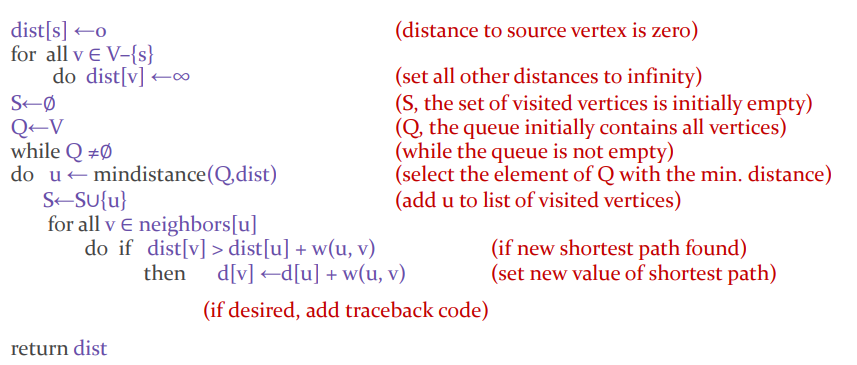

src: https://www2.cs.science.cmu.ac.th/courses/204735/lib/exe/fetch.php?media=dijkstra.pdf

Notice

* 1. Both select node using minimal distance (or minimal path cost).
* 2. Mechanism to compute cost path is the same.
  * ```d[u] + w[w,v]``` in Dijkstra pseudocode
  * Through ```node.path_cost``` in USC python
* 3. The main difference is in the initial queue.
  * DA: ```Q <- V``` (all vertices are added in the queue)
  * UCS: ```fringe.append(Node(problem.initial))``` (only the starting node is added in the queue)
  * Consequence: USC requires less memory.
* 4. Result
  * DA: ```dist```: minimal distances to ```S``` from all nodes.
  * UCS: ```node, search_cost```: path (through ```node```) from start node to the goal node.

## Dijkstra algorithm

In [40]:
def argmin(ddist, candidates):
    kmin = candidates[0]
    mindist = ddist[kmin]
    
    for k in candidates[1:]:
        d = ddist[k]
        if d < mindist:
            kmin = k
            mindist = d
    return kmin

In [55]:
INFTY = 1e8

source = "Bucharest"

dist = {}
for k in romania_map["location"]:
    # print(k)
    dist[k] = INFTY

dist[source] = 0

visited = []

# for k in dist:
#     print(k, dist[k])

# Initialize the queue with all nodes
Q = list(romania_map["location"].keys())

while len(Q) > 0:
# if True:

    # Select element with min distance
    u = argmin(dist, Q)

    Q.remove(u)

    # Add u to the visited
    visited.append(u)

    neighbors = list(romania_map["transit"][u].keys())
    for v in neighbors:
        # print('v = ', v, '; dist=', dist[v])
        d = dist[u] + romania_map["transit"][u][v]
        if d < dist[v]:
            dist[v] = d
            
# end while 

dist

{'Arad': 418,
 'Bucharest': 0,
 'Craiova': 239,
 'Drobeta': 359,
 'Eforie': 269,
 'Fagaras': 211,
 'Giurgiu': 90,
 'Hirsova': 183,
 'Iasi': 319,
 'Lugoj': 504,
 'Mehadia': 434,
 'Neamt': 406,
 'Oradea': 429,
 'Pitesti': 101,
 'Rimnicu Vilcea': 198,
 'Sibiu': 278,
 'Timisoara': 536,
 'Urziceni': 85,
 'Vaslui': 227,
 'Zerind': 493}